In [3]:
from google.colab import files


uploaded = files.upload()
import pandas as pd

Saving autism.csv to autism.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded["autism.csv"]))
print(df)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice  \


In [11]:
# prompt: Develop a linear regression model for forecasting time series data

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Print the columns of the DataFrame to identify the correct time index column
print(df.columns)

# Assuming 'Time' is your time index column and 'Value' is the column to forecast
# Replace 'Time' and 'Value' with your actual column names if different.
# Replace 'A1' with the actual column name identified from the print statement above
# For example, if the time index column is 'Timestamp', use:
# df['Time'] = pd.to_datetime(df['Timestamp'])
# Assuming 'age_desc' is the actual time index column
# Handling the '18 and more' case by converting it to a numerical value (e.g., 18)
df['age_desc'] = pd.to_numeric(df['age_desc'], errors='coerce')
df['age_desc'] = df['age_desc'].fillna(18) # Replacing NaN with 18 (or any suitable value)
# You can then create a new 'Time' column as a date range if needed:
# For example, starting from a base date and adding the 'age_desc' as years
# Instead of using 'Y', use 'D' (days) and calculate the number of days in a year
# assuming an average of 365.25 days per year to account for leap years.
df['Time'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(df['age_desc'] * 365.25, unit='D')
df = df.set_index('Time')

# Prepare the data
X = np.arange(len(df)).reshape(-1, 1)  # Time as feature
y = df['A2_Score'].values  # Values to forecast, Assuming 'A2_Score' is the target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Forecast future values (e.g., next 5 periods)
future_X = np.arange(len(X), len(X) + 5).reshape(-1, 1)  # Extend the time index
future_predictions = model.predict(future_X)

print("Future Predictions:")
print(future_predictions)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
Mean Squared Error: 0.2542509322981955
Future Predictions:
[0.54901614 0.54924329 0.54947044 0.54969759 0.54992475]


Saving autism.csv to autism (2).csv

Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 

<ipython-input-14-46ac491227a3>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


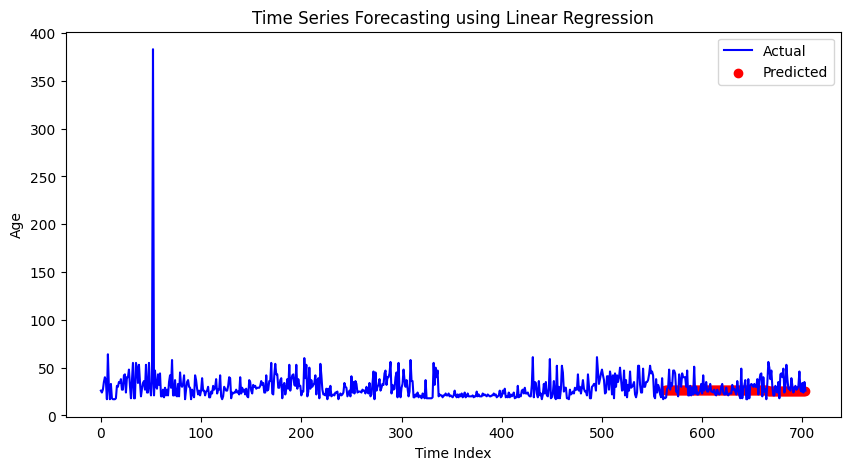

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files

# Ask the user to upload a CSV file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)

# Show dataset info
print("\nDataset Loaded Successfully!")
print(df.info())

# Handle missing values (e.g., fill missing age with median)
if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)
else:
    print("\nColumn 'age' not found in dataset. Please modify target variable accordingly.")

# Create a synthetic time index if no real timestamp column exists
df['time_index'] = np.arange(len(df))

# Select features (modify as needed)
X = df[['time_index']]
y = df['age']  # Change this if predicting a different column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(df['time_index'], df['age'], label='Actual', color='blue')
plt.scatter(X_test, y_pred, label='Predicted', color='red')
plt.xlabel("Time Index")
plt.ylabel("Age")
plt.title("Time Series Forecasting using Linear Regression")
plt.legend()
plt.show()
